# Getting the data

In [1]:
from pycaret.datasets import get_data
from pathlib import Path

In [2]:
dataset = get_data('bike')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [3]:
#https://towardsdatascience.com/time-series-forecasting-with-pycaret-regression-module-237b703a0c63

In [4]:
dataset.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61
17378,17379,12/31/2012,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,49


In [5]:
dataset['peak'] = dataset[['hr', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( x['hr'] == 8 or 17 <= x['hr'] <= 18 or 12 <= x['hr'] <= 13)) or (x['workingday'] == 0 and  10 <= x['hr'] <= 19)], axis = 1)

/tmp/ipykernel_1489256/1048381235.py:1: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  dataset['peak'] = dataset[['hr', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( x['hr'] == 8 or 17 <= x['hr'] <= 18 or 12 <= x['hr'] <= 13)) or (x['workingday'] == 0 and  10 <= x['hr'] <= 19)], axis = 1)


In [6]:
dataset.yr.value_counts()

1    8734
0    8645
Name: yr, dtype: int64

In [7]:
dataset.drop(['windspeed'], axis=1, inplace=True)

In [8]:
new_data = dataset.loc[dataset.dteday == '12/31/2012'] #last day in the dataset for simulating future data 
dataset = dataset[~dataset.instant.isin(new_data.instant)].reset_index(drop=True) #used to show historical data in this tutorial 

In [9]:
NB_DIR = %pwd
NB_DIR = Path(NB_DIR)
DATA_DIR = NB_DIR/'..'/'data'
DATA_DIR.mkdir(exist_ok=True)

new_data.to_csv(DATA_DIR/'new_data.csv', index=False); 
dataset.to_csv(DATA_DIR/'data.csv', index=False);

In [10]:
test = dataset.loc[(dataset['yr'] == 1) & (dataset.season == 4)]
train = dataset[~dataset.instant.isin(test.instant)]

In [11]:
test.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,cnt,peak
17112,17113,12/20/2012,4,1,12,19,0,4,1,3,0.34,0.3182,0.71,118,0
17113,17114,12/20/2012,4,1,12,20,0,4,1,3,0.34,0.3333,0.76,50,0
17114,17115,12/20/2012,4,1,12,21,0,4,1,3,0.34,0.3333,0.76,26,0
17115,17116,12/20/2012,4,1,12,22,0,4,1,3,0.34,0.3333,0.87,21,0
17116,17117,12/20/2012,4,1,12,23,0,4,1,3,0.40,0.4091,0.82,13,0


In [12]:
dataset.shape, train.shape, test.shape

((17355, 15), (15257, 15), (2098, 15))

# Setting up the environment in PyCaret

In [13]:
from pycaret.regression import *

In [14]:
dataset.shape

(17355, 15)

In [16]:
# initialize setup
data = setup(data=train,test_data=test,target ='cnt', train_size=0.99, data_split_shuffle = False, fold_strategy = 'timeseries',  ignore_features = ['dteday'], numeric_features = ['instant'], fold = 10, normalize=True)

,Description,Value
0,session_id,684
1,Target,cnt
2,Original Data,"(15257, 15)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(15257, 36)"


# Select models

In [17]:
best_models = compare_models(n_select=4, sort='RMSLE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,43.0279,4858.6226,67.9422,0.8003,0.4359,0.4219,0.3560
rf,Random Forest Regressor,46.1733,6733.8537,74.8813,0.7243,0.4636,0.5212,0.3840
lightgbm,Light Gradient Boosting Machine,39.0136,3792.4853,60.3286,0.8458,0.5115,0.5764,0.0320
dt,Decision Tree Regressor,56.6855,10526.4619,91.8691,0.5747,0.5595,0.6180,0.0230
gbr,Gradient Boosting Regressor,54.4630,6197.9360,76.2986,0.7777,0.7201,1.1418,0.1540
knn,K Neighbors Regressor,76.4452,12247.5234,108.4777,0.5446,0.8853,1.5678,0.0400
omp,Orthogonal Matching Pursuit,95.5388,17634.6182,128.1685,0.3918,1.0907,2.3420,0.0140
lasso,Lasso Regression,92.7347,15145.5886,119.5423,0.4638,1.1258,2.9511,0.0850
ada,AdaBoost Regressor,86.7589,11707.5056,105.0503,0.5796,1.1562,3.4277,0.1040
br,Bayesian Ridge,93.5719,14832.2070,118.7208,0.4647,1.1701,3.1898,0.0210


In [18]:
best_models

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=684, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=684, verbose=0, warm_start=False),
 LGBMRegr

# Hyperparameter tuning

In [23]:
#tuned_best_model = tune_model(best_models[1], optimize='RMSLE')

# Combining models

In [22]:
blender_specific = blend_models(estimator_list = best_models[:2])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,33.9271,3332.5413,57.7282,0.6895,0.5124,0.5000
1,41.9784,3598.2771,59.9856,0.8401,0.4756,0.5221
2,27.9695,2230.2783,47.2258,0.8987,0.3026,0.2658
3,62.9917,9685.7538,98.4162,0.5663,0.5818,0.8087
4,30.4175,2356.0725,48.5394,0.8457,0.4621,0.5052
5,36.2345,3169.4035,56.2975,0.7694,0.4678,0.5099
6,58.6010,8690.1445,93.2209,0.7532,0.4108,0.3424
7,45.2941,5191.9077,72.0549,0.8899,0.4053,0.3752
8,42.6927,4662.1999,68.2803,0.8994,0.2668,0.2152
9,47.2877,5778.0660,76.0136,0.8939,0.4947,0.5267


# Analyze results

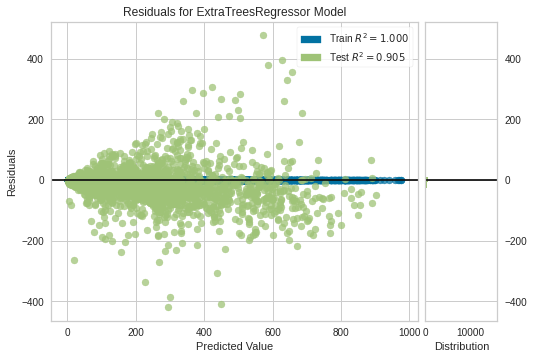

In [24]:
plot_model(best_models[0])

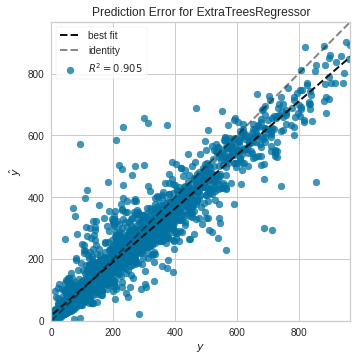

In [25]:
plot_model(best_models[0], plot = 'error')

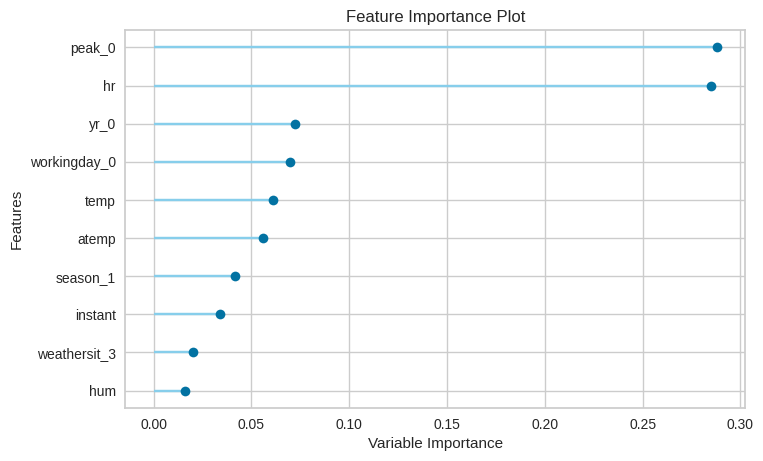

In [26]:
#Feature importance scores can be used to select which features to ignore (lowest scores) and which ones to keep (highest scores)
plot_model(best_models[0], plot='feature')

In [27]:
prediction_holdout = predict_model(best_models[0])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,40.7181,4306.5722,65.6245,0.9046,0.3501,0.2772


In [28]:
prediction_holdout.tail()

,instant,hr,temp,atemp,hum,season_1,season_2,season_3,season_4,yr_0,...,weekday_5,weekday_6,workingday_0,weathersit_1,weathersit_2,weathersit_3,weathersit_4,peak_0,cnt,Label
2093,2.115637,1.077984,-0.849572,-0.942422,0.431019,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,118,162.43
2094,2.115861,1.222645,-0.849572,-0.856980,0.686309,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,50,129.48
2095,2.116085,1.367306,-0.849572,-0.856980,0.686309,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,26,120.49
2096,2.116309,1.511967,-0.849572,-0.856980,1.247947,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,21,75.07
2097,2.116533,1.656628,-0.546215,-0.428073,0.992657,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,13,95.45


## Train final model

In [29]:
final_model = finalize_model(best_models[0])

# Export model

In [30]:
MODEL_DIR = NB_DIR/'..'/'model'
MODEL_DIR.mkdir(exist_ok=True)

In [31]:
save_model(final_model, MODEL_DIR/'final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['dteday'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=['instant'],
                                       target='cnt', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 num...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=Non

In [ ]:
#Other similar tasks: energy consumtion prediction